In [287]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import string
%matplotlib inline
import matplotlib.pyplot as plt

In [288]:
top_25 = pd.read_csv('top_25_key.csv')
full_metro = pd.read_csv('Full Metro List.csv')

In [196]:
city = []
state = []
i = 0
for city_ in top_25.metro:
    city.append(top_25.metro.str.split(",")[i][0])
    state.append(top_25.metro.str.split(",")[i][1])
#     print(city_)
    i += 1
        

In [427]:
state

[' Colorado',
 ' California',
 ' California',
 ' Virginia',
 ' Colorado',
 ' California',
 ' California',
 ' Utah',
 ' Connecticut',
 ' Connecticut',
 ' Connecticut',
 ' Massachusetts',
 ' Alaska',
 ' Florida',
 ' Florida',
 ' Florida',
 ' California',
 ' California',
 ' California',
 ' Florida',
 ' Florida',
 ' Florida',
 ' Hawaii',
 ' Michigan',
 ' California',
 ' California',
 ' California',
 ' Colorado',
 ' New Hampshire',
 ' New Hampshire',
 ' California',
 ' California',
 ' California',
 ' District of Columbia',
 ' Virginia',
 ' Virginia',
 ' Minnesota',
 ' Minnesota',
 ' Wisconsin',
 ' California',
 ' California',
 ' Maine',
 ' Texas']

In [292]:
#unemployment rate

u_rate = []
for c in city:
    target = 'https://www.google.com/search?ei=BGZCXN_4EJSSjwSrvJegAg&q=unemployment+rate+{}'.format(c)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    resp = requests.get(target, headers=headers)
    soup = BeautifulSoup(resp.text, "html.parser")
    
    try:
        u_rate.append(soup.find('div', {'class': 'kpd-ans' }).get_text().strip()[:3])
    except:
            if c == 'Marco Island':
                target = "https://www.google.com/search?ei=BGZCXN_4EJSSjwSrvJegAg&q=unemployment+rate+Marco Island"
                headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
                resp = requests.get(target, headers=headers)
                soup = BeautifulSoup(resp.text, "html.parser")
                u_rate.append(soup.find('span', {'class': 'ILfuVd'}).get_text()[75:78])
            elif c == 'Naples':
                target = "https://www.google.com/search?ei=BGZCXN_4EJSSjwSrvJegAg&q=unemployment+rate+naples"
                headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
                resp = requests.get(target, headers=headers)
                soup = BeautifulSoup(resp.text, "html.parser")
                u_rate.append(soup.find('span', {'class': 'ILfuVd'}).get_text()[35:38])
            elif c == 'Immokalee':
                target = "https://www.google.com/search?ei=BGZCXN_4EJSSjwSrvJegAg&q=unemployment+rate+immokalee"
                headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
                resp = requests.get(target, headers=headers)
                soup = BeautifulSoup(resp.text, "html.parser")
                u_rate.append(soup.find('span', {'class': 'ILfuVd'}).get_text()[38:41])
#     print(c)
    
    

In [299]:
top_25['Unemployment_Rate'] = u_rate

In [442]:
top_25.head()

,rank_key,metro,Unemployment_Rate,Number_of_Jobs
0,1,"Boulder, Colorado",1.9,30242
1,2,"Santa Cruz, California",2.6,8298
2,2,"Watsonville, California",9.8,7672
3,3,"Charlottesville, Virginia",2.4,3123
4,4,"Fort Collins, Colorado",1.9,5792


In [368]:
#number of jobs
jobs = []
for c in city:
    target = 'https://www.indeed.com/jobs?q=&l={}'.format(c)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    resp = requests.get(target, headers=headers)
    soup = BeautifulSoup(resp.text, "html.parser")
    jobs.append(soup.find("div", {"id": "searchCount"}).get_text().strip())
    
    
# for x in top_25.jobs:
#     num = x[10:16]
#     print(num)    

In [369]:
t_jobs = []
for j in jobs:
    j = int(j.split(' ')[3].replace(",", ""))
    t_jobs.append(j)

In [ ]:
# 'https://www.google.com/search?ei=TWNDXJXtKOXbjwS0v4zwDA&q={}+population'.format(x)

In [455]:
#population
pop = []
for x in top_25.metro: 
    target = 'https://www.google.com/search?ei=TWNDXJXtKOXbjwS0v4zwDA&q={}+population'.format(x)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    resp = requests.get(target, headers=headers)
    soup = BeautifulSoup(resp.text, "html.parser")
    
    if x == 'Immokalee, Florida':
        p = soup.find("div", {"class": "Z0LcW"}).get_text().replace(",", "")
#         print(p)
        pop.append(p)
    else:
        p = (soup.find("div", {"class": "kpd-ans"})).get_text().split(' ')[0].replace(",", "")
#         print(p)
        pop.append(p)
    

In [481]:
top_25['Population'] = pop
top_25.head()

,rank_key,metro,Unemployment_Rate,Number_of_Jobs,Population
0,1,"Boulder, Colorado",1.9,30242,107125
1,2,"Santa Cruz, California",2.6,8298,65021
2,2,"Watsonville, California",9.8,7672,54098
3,3,"Charlottesville, Virginia",2.4,3123,48019
4,4,"Fort Collins, Colorado",1.9,5792,165080


In [479]:
(float(top_25.Population[6].split('\xa0')[0]) * 1000000)

1034999.9999999999

In [474]:
top_25.Population[6] = 

'1.035\xa0million'

In [482]:
top_25['Number_of_Jobs'] = t_jobs

In [483]:
top_25.Unemployment_Rate = top_25.Unemployment_Rate.map(float)

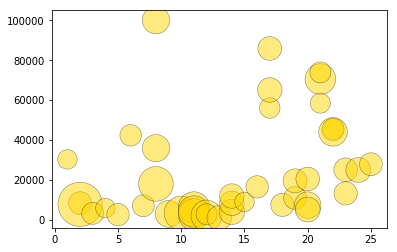

In [484]:
plt.scatter(top_25.rank_key, top_25.Number_of_Jobs,s = top_25.Unemployment_Rate * 200, alpha = .5, c = "gold",
            edgecolor="black", label='Suburban', linewidths=.5)

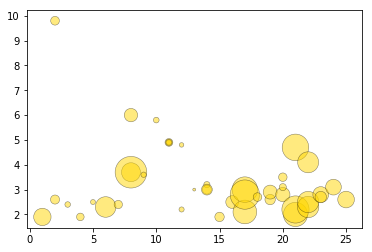

In [485]:
plt.scatter(top_25.rank_key, top_25.Unemployment_Rate,s = top_25.Number_of_Jobs / 100, alpha = .5, c = "gold",
            edgecolor="black", label='Suburban', linewidths=.5)

In [ ]:
plt.xlabel('Count of Rides')
plt.ylabel('Average Fare in Dollars')
plt.title('Pyber - Ride Data')
plt.legend()
plt.xlim(0, 42.5)
plt.ylim(17.5, 45)
plt.text(10, 10, 'Size of Bubble indicates Driver Count', style='italic',
        bbox={'facecolor': 'lightskyblue', 'alpha': .5, 'pad': 10})
plt.grid(True)